# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [1]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [3]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [5]:
# TODO: Print dataset info

insurance.info()
# TODO: Print descriptive statistics

insurance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Define Features and Target

In [7]:
from numpy._core import numeric
# TODO: Set numeric and categorical feature lists
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# TODO: Define target column

target='charges'
# TODO: Create X and y
X=insurance.drop(columns=target)
y=insurance[target]

# TODO: Display X head

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Train Test Split

In [8]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [17]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
mlr_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("linreg", LinearRegression()),
    ]
)

# TODO: Fit the model
mlr_model.fit(X_train,y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [21]:
# TODO: Complete function to print performance
def print_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Model Performance")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R²   : {r2:.4f}")
    print()






## Evaluate Model

In [22]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
print("Train Performance")
print_performance(y_train, y_train_pred)
print("Test Performance")
print_performance(y_test, y_test_pred)


Train Performance
Model Performance
MSE  : 37277681.70
RMSE : 6105.55
MAE  : 4208.23
R²   : 0.7417

Test Performance
Model Performance
MSE  : 33596915.85
RMSE : 5796.28
MAE  : 4181.19
R²   : 0.7836



## Inspect Coefficients

In [23]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

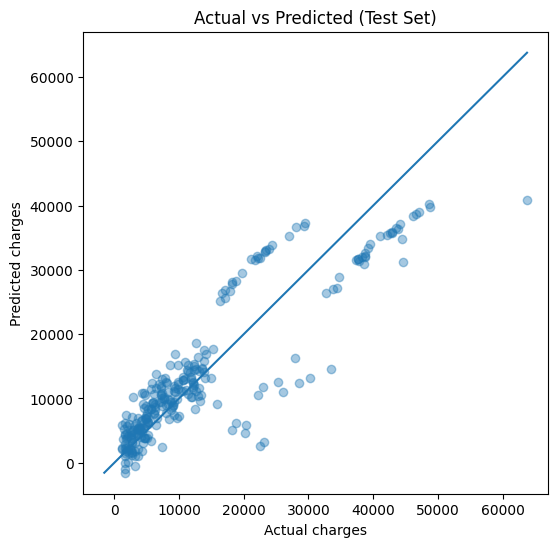

In [24]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

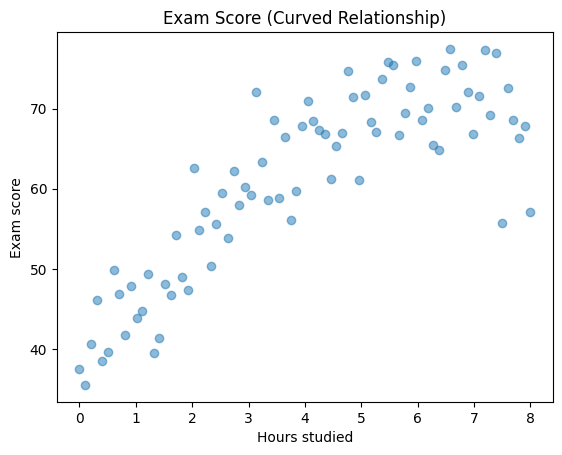

In [25]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [26]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [27]:
# TODO: Create helper to fit polynomial model
def fit_polynomial_model(degree, X_train, y_train):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    linreg = LinearRegression()

    model = Pipeline([
        ('poly', poly_features),
        ('linreg', linreg)
    ])

    model.fit(X_train, y_train)
    return model



In [31]:
# Fit models for degrees 1, 2, 3, 8 and store performance
degrees_list = [1, 2, 3, 8]
results = []

for degree in degrees_list:
    model = fit_polynomial_model(degree, X_train_h, y_train_h)

    y_train_pred = model.predict(X_train_h)
    y_test_pred = model.predict(X_test_h)

    print(f"Degree {degree} Performance (Train)")
    print_performance(y_train_h, y_train_pred)
    print(f"Degree {degree} Performance (Test)")
    print_performance(y_test_h, y_test_pred)
    print("-"*40)

    results.append({
        'degree': degree,
        'r2_train': r2_score(y_train_h, y_train_pred),
        'r2_test': r2_score(y_test_h, y_test_pred),
        'rmse_train': np.sqrt(mean_squared_error(y_train_h, y_train_pred)),
        'rmse_test': np.sqrt(mean_squared_error(y_test_h, y_test_pred))
    })

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results)
results_df

Degree 1 Performance (Train)
Model Performance
MSE  : 43.92
RMSE : 6.63
MAE  : 5.39
R²   : 0.6555

Degree 1 Performance (Test)
Model Performance
MSE  : 27.10
RMSE : 5.21
MAE  : 3.67
R²   : 0.7942

----------------------------------------
Degree 2 Performance (Train)
Model Performance
MSE  : 23.27
RMSE : 4.82
MAE  : 3.83
R²   : 0.8175

Degree 2 Performance (Test)
Model Performance
MSE  : 18.53
RMSE : 4.31
MAE  : 3.52
R²   : 0.8593

----------------------------------------
Degree 3 Performance (Train)
Model Performance
MSE  : 21.18
RMSE : 4.60
MAE  : 3.82
R²   : 0.8339

Degree 3 Performance (Test)
Model Performance
MSE  : 19.52
RMSE : 4.42
MAE  : 3.38
R²   : 0.8518

----------------------------------------
Degree 8 Performance (Train)
Model Performance
MSE  : 18.89
RMSE : 4.35
MAE  : 3.44
R²   : 0.8519

Degree 8 Performance (Test)
Model Performance
MSE  : 24.29
RMSE : 4.93
MAE  : 4.15
R²   : 0.8156

----------------------------------------


,degree,r2_train,r2_test,rmse_train,rmse_test
0,1,0.655538,0.794243,6.627386,5.206104
1,2,0.817477,0.859304,4.824255,4.305022
2,3,0.833923,0.851786,4.601789,4.418552
3,8,0.851867,0.815580,4.346083,4.928777


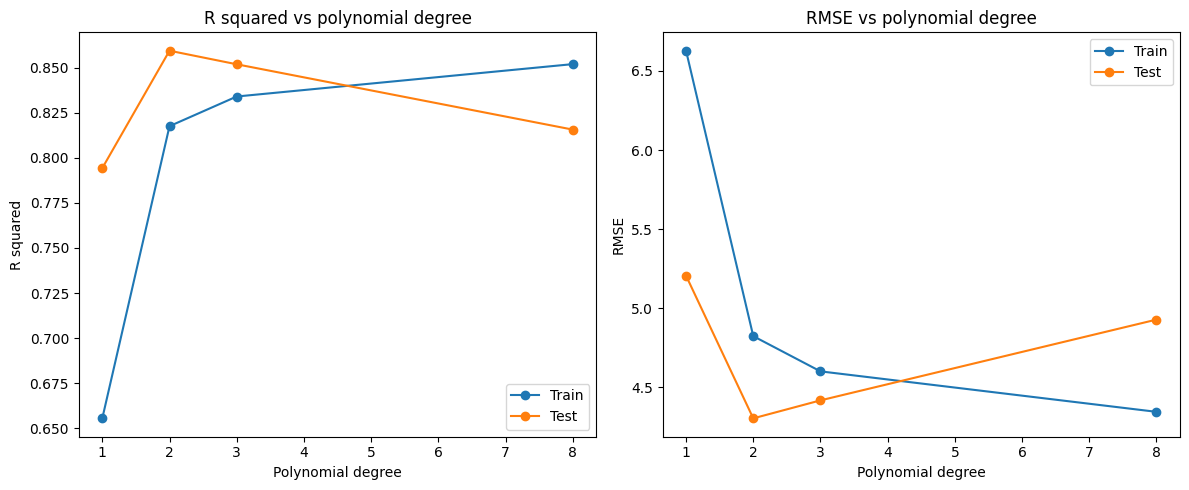

In [33]:
# TODO: Plot fitted curves for each degree (R2,RMSE)

fig,axes=plt.subplots(1,2,figsize=(12,5))

# R squared plot

axes[0].plot(results_df['degree'],results_df['r2_train'],marker='o',label='Train')
axes[0].plot(results_df['degree'],results_df['r2_test'],marker='o',label='Test')
axes[0].set_xlabel('Polynomial degree')
axes[0].set_ylabel('R squared')
axes[0].set_title('R squared vs polynomial degree')
axes[0].legend()
# RMSE plot

axes[1].plot(results_df['degree'],results_df['rmse_train'],marker='o',label='Train')
axes[1].plot(results_df['degree'],results_df['rmse_test'],marker='o',label='Test')
axes[1].set_xlabel('Polynomial degree')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE vs polynomial degree')
axes[1].legend()

plt.tight_layout()
plt.show()

## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.

1. Which polynomial degree overfits and why

  * High degrees (e.g., 5 or above) usually overfit the training data.

  * The model tries to fit even tiny fluctuations in the training data, capturing noise rather than the true underlying pattern.

  * This results in very low training error but poor performance on unseen (test) data.

  * Overfitting happens because the model becomes too flexible and models noise as if it were signal.

**Example:**

 * Degree = 1 → linear, may underfit if the true relationship is non-linear.

 * Degree = 2 or 3 → reasonable fit.

 * Degree = 5 → likely overfitting.

2. Which degree gives the best generalization

  * Medium degrees (typically 2 or 3) usually give the best generalization.

  * The model is flexible enough to capture non-linear trends without fitting the noise.

  * Test performance metrics like R², RMSE, and MAE are usually optimal at this degree.

3. Lessons about MLR and Polynomial Regression

   1. **Multiple Linear Regression (MLR)**

     * Assumes a linear relationship between features and the target.

     * Works well if the relationship is mostly linear.

     * Cannot capture strong non-linear trends unless features are manually   transformed.

    2. **Polynomial Regression**

      * Extends linear regression by including powers of features.

      * Can model non-linear relationships while still using LinearRegression.

      * The degree controls the trade-off between flexibility and overfitting.

      * Always evaluate on test data; low training error alone is misleading.

**Key takeaway: **

* Low degree → simple, may underfit.

* Medium degree → balanced, good generalization.

* High degree → overfit, poor performance on new data.